# **Customer Analysis**

---



### `Bachtiyar Muclis Arief`
email  : bachtiyar.arief11@gmail.com

no. hp : 087859355577

portofolio : www.github.com/....


---



DQLab Store merupakan perusahaan yang bergerak dibidang industri retail. Bersumber dari data yang diperoleh di https://raw.githubusercontent.com/myarist/DQLab/master/Project/SQL/Project%20Data%20Analysis%20for%20Retail%20Sales%20Performance%20Report/Data/dqlab_sales_store.sql akan dilakukan analisa pelanggan pada perusahaan tersebut guna melihat pola pelanggan sehingga perusahaan dapat menentukan kebijakan mengenai siapa target pelanggan yang akan dipertahankan, strategi retensi pelanggan yang akan ditetapkan dan mengukur kinerja retensi pelanggan dikemudian hari.

In [3]:
#import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from textwrap import wrap

data tersimpan pada database MySQL, sehingga perlu untuk mengkoneksikan antara MySQL dengan Python dengan cara mengimport library `mysql.connector` lalu lakukan proses query SQL dan terjemahkan kedalam bahasa Python melalui library `pandas`

In [123]:
#import mysql connector to python
import mysql.connector

#Koneksikan mysql ke python
mydb = mysql.connector.connect(host = "localhost", user = "root", password = '*********', database = "dqlab")
alldatacursor = mydb.cursor()

#Lakukan proses query
alldatacursor.execute("SELECT * FROM sales_store")
result1 = alldatacursor.fetchall()

#Ubah ke dalam bahasa pandas (dataframe pandas)
dataall = pd.DataFrame(result1)

#Lakukan simple profiling
dataall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              5497 non-null   int64  
 1   order_status          5497 non-null   object 
 2   customer              5496 non-null   object 
 3   order_date            5497 non-null   object 
 4   order_quantity        5497 non-null   int64  
 5   sales                 5497 non-null   int64  
 6   discount              5497 non-null   float64
 7   discount_value        5497 non-null   int64  
 8   product_category      5497 non-null   object 
 9   product_sub_category  5497 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.6+ KB


kolom - kolom yang akan digunakan dalam analisa retensi pelanggan akan berfokus pada beberapa kolom saja, diantaranya : kolom `order_id` (kode pemesanan),  `order_status` (untuk menunjukkan pelanggan menyelesaikan transaksinya (*finished order*), membatalkan pesanan (*cancelled order*) atau pengembalian produk (*returned order*)), `customer` (nama pelanggan), `order_date` (tanggal pelanggan melakukan transaksi) dan `sales` (total penjualan). 

## 1. Jumlah Pelanggan yang Telah Menyelesaikan Transaksi
Pelanggan yang telah melakukan transaksi ditandai dengan `order_status` yang memuat nilai/record finished order sehingga perlu dilakukan penyesuaian kondisi dengan menambahkan query **WHERE** untuk proses seleksi. Setelah itu hitung jumlah row yang unik (query : **COUNT DISTINCT**) pada kolom customer dan lakukan *grouping* (pengelompokan) berdasarkan bulan dan tahun. Tujuannya untuk mengetahui *trend* pertumbuhan jumlah pelanggan dari waktu ke waktu

In [126]:
#Ambil data total customer yang telah menyelesaikan transaksi (order status = finished)
custcountcursor = mydb.cursor()
custcountcursor.execute("\
 SELECT YEAR(order_date) AS tahun, MONTH(order_date) AS no_bulan, \
       MONTHNAME(to_date(order_date)) AS bulan, COUNT(DISTINCT customer) AS total_finishedtrx_cust \
 FROM sales_store \
	  WHERE LOWER(order_status) LIKE '%finished%' \
    	GROUP BY 1, 2, 3 \
	  ORDER BY 1, 2"\
)
result2 = custcountcursor.fetchall()
banyakcust = pd.DataFrame(result2)
banyakcust['bulan_tahun'] = banyakcust['bulan']+" "+banyakcust['tahun'].astype(str)
banyakcust.head()

,tahun,no_bulan,bulan,total_finishedtrx_cust,bulan_tahun
0,2009,1,January,107,January 2009
1,2009,2,February,88,February 2009
2,2009,3,March,110,March 2009
3,2009,4,April,98,April 2009
4,2009,5,May,97,May 2009


Pada tabel diatas kolom `total_finishedtrx_cust` merupakan kolom yang merepresentasikan jumlah pelanggan yang menyelesaikan transaksi. Agar mudah dilakukan analisa dan dapat dilihat pola jumlah pelanggan tiap bulannya ubah data numerik yang telah diperoleh ke dalam visualisasi data menggunakan grafik line/garis. Grafik garis umumnya digunakan untuk menyajikan data berupa trend atau perkembangan suatu informasi dari waktu ke waktu, dengan demikian akan mudah melihat perkembangan jumlah pelanggan dari Januari 2009 hingga akhir 2012 pada perusahaan tersebut 

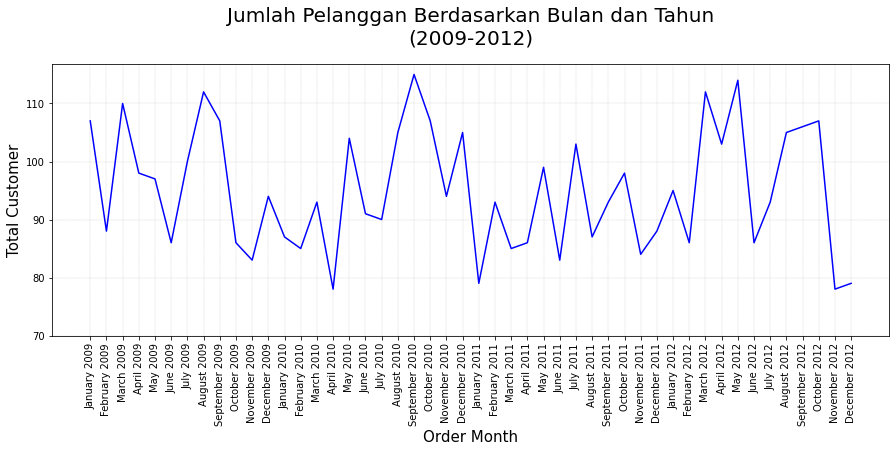

In [8]:
#Plot jumlah customer berdasarkan bulan dan tahun pada rentang 2009-2012
plt.figure(figsize=(15,5))  
plt.plot(banyakcust['bulan_tahun'], banyakcust['total_finishedtrx_cust'], color = 'blue')
plt.title('Jumlah Pelanggan Berdasarkan Bulan dan Tahun\n(2009-2012)', loc='center', pad=20, fontsize=20, color='black') 
plt.xlabel('Order Month', fontsize=15) 
plt.ylabel('Total Customer', fontsize=15) 
plt.grid(color='darkgray', linestyle=':', linewidth=0.4) 
plt.xticks(rotation=90)
plt.ylim(70)
plt.show() 

Pada grafik diatas terlihat pergerakan jumlah pelanggan yang menyelesaikan transaksi bergerak fluktuatif yang artinya dalam kurun waktu 4 tahun tidak banyak kemajuan secara signifikan yang tentunya tujuan perusahaan adalah pelanggan dari waktu ke waktu mengalami peningkatan (bergerak naik). Sehingga perlu dilakukan evaluasi pada strategi pemasaran, menganalisa kompetitor, dll sehingga diharapkan di kedepannya jumlah pelanggan bergerak sesuai yang diharapkan perusahaan

# 2. Perbandingan Jumlah Pelanggan Berdasarkan Bulan dan Tahun

Untuk melihat trend jumlah pelanggan yang menyelesaikan transaksi di kelompokan berdasarkan bulan dan tahun digunakan grafik bar (batang). Grafik batang dapat digunakan untuk menyajikan data pertumbuhan sekaligus melihat perbandingan data (dalam hal ini jumlah pelanggan).

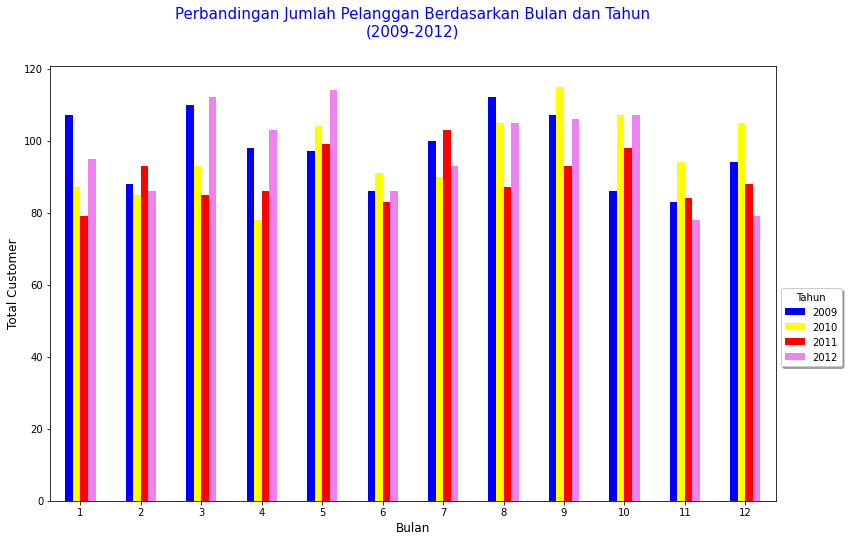

In [9]:
#Plot jumlah customer tiap bulan sebagai perbandingan pertumbuhan di tiap tahunnya (2009-2012)
plt.rcParams["figure.figsize"] = (13,8)
banyakcust.groupby(['no_bulan','tahun'])['total_finishedtrx_cust'].sum().sort_values(ascending = False).unstack()\
   .plot(kind='bar', stacked=False, color =['blue','yellow','red','violet'])
plt.title('Perbandingan Jumlah Pelanggan Berdasarkan Bulan dan Tahun\n(2009-2012)', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Customer', fontsize=12) 
plt.legend(bbox_to_anchor=(1,0.5), shadow=True, ncol=1, title='Tahun') 
plt.xticks(rotation=0)
plt.show() 

Pada grafik diatas terlihat bahwa trend terbaik yang bisa diperoleh terdapat dibulan ke-5 (bulan Mei) dimana pertumbuhan jumlah pelanggan tiap tahun dibulan Mei bergerak naik dan trend yang kurang baik terjadi di bulan Desember (cenderung menurun tiap tahun di bulan Desember). Perlu dilakukan evaluasi dan analisa mengenai faktor apa saja yang berpengaruh sehingga pelanggan tertarik belanja di bulan Mei (apakah karena discount yang diberikan ataukah hal lain) agar dapat diterapkan di bulan - bulan yang lain.

# 3. Jumlah Pelanggan Baru Berdasarkan Bulan dan Tahun

Selain mempertahankan pelanggan yang pernah melakukan transaksi, menganalisa dan meningkatkan pertumbuhan jumlah pelanggan baru dari waktu ke waktu juga penting untuk dilakukan. Sebab, dengan meningkatkan jumlah pelanggan baru dan mempertahankan pelanggan lama, bisnis dapat lebih berkembang dan bertahan menghadapi persaingan dunia usaha. Oleh karena itu, memiliki pelanggan yang lebih banyak dari sebelumnya adalah salah satu tujuan dari para pemilik usaha. 

Untuk mendapatkan data mengenai pelanggan baru tiap bulannya digunakan query dan syntax berikut :

In [18]:
#Banyak customer baru yang menyelesaikan transaksi tiap bulan pada tahun 2009-2012
custnewcursor = mydb.cursor()
custnewcursor.execute("\
 SELECT YEAR(order_date) AS tahun, MONTH(order_date) AS no_bulan, MONTHNAME(to_date(order_date)) AS bulan, \
       COUNT(customer) AS cust_baru\
 FROM (\
	     SELECT customer, order_date, ROW_NUMBER() OVER(PARTITION BY customer ORDER BY order_date) AS RowId\ 
       FROM sales_store\
		      WHERE LOWER(order_status) LIKE '%finished%'\
	        ORDER BY 2, 1\
	  ) a\
	WHERE a.RowId = 1\
		GROUP BY 1, 2, 3\
	ORDER BY 1, 2;\
)
result3 = custnewcursor.fetchall()

#Ubah hasilnya kedalam bahasa pandas
banyakcustnew = pd.DataFrame(result3)
banyakcustnew['bulan_tahun'] = banyakcustnew['bulan']+" "+banyakcustnew['tahun'].astype(str)

#Join dengan dataframe banyakcust untuk mendapatkan detail bulan dan tahun yang berurutan 
x = banyakcust['bulan_tahun']
banyakcustnew = banyakcustnew.merge(x, how='right', on='bulan_tahun')
banyakcustnew = banyakcustnew.fillna(0)
banyakcustnew.head(10)

,tahun,no_bulan,bulan,cust_baru,bulan_tahun
0,2009,1,January,107,January 2009
1,2009,2,February,70,February 2009
2,2009,3,March,85,March 2009
3,2009,4,April,56,April 2009
4,2009,5,May,48,May 2009
5,2009,6,June,42,June 2009
6,2009,7,July,37,July 2009
7,2009,8,August,37,August 2009
8,2009,9,September,38,September 2009
9,2009,10,October,22,October 2009


ubah data numerik yang telah diperoleh menjadi visualisasi data untuk melihat pertumbuhan pelanggan baru di tiap bulannya

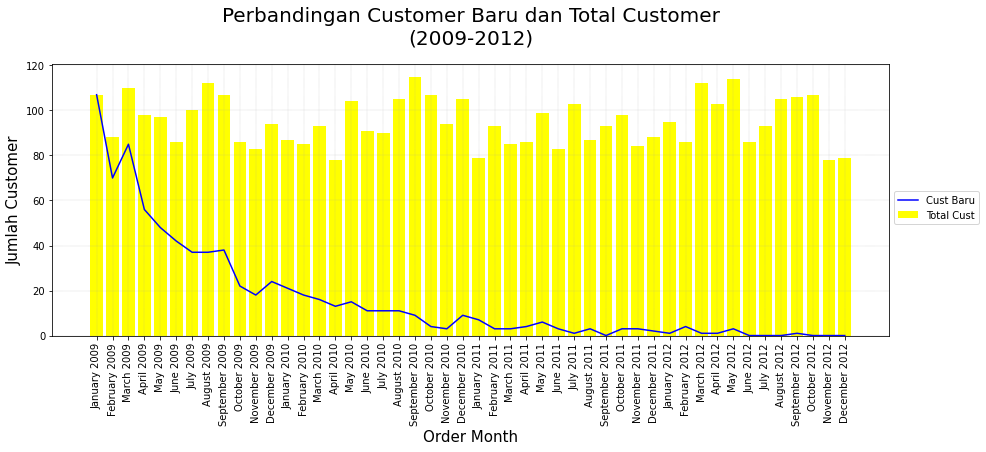

In [16]:
#Plot untuk mengetahui trend cust baru dan perbandingannya dengan jumlah cust pada tahun 2009-2012
plt.figure(figsize=(15,5)) 
plt.bar(banyakcust['bulan_tahun'], banyakcust['total_finishedtrx_cust'],color = 'yellow')  
plt.plot(banyakcustnew['bulan_tahun'], banyakcustnew['cust_baru'], color = 'blue') 
plt.title('Perbandingan Customer Baru dan Total Customer\n(2009-2012)', loc='center', pad=20, fontsize=20, color='black') 
plt.xlabel('Order Month', fontsize=15) 
plt.ylabel('Jumlah Customer', fontsize=15) 
plt.grid(color='darkgray', linestyle=':', linewidth=0.4) 
plt.xticks(rotation=90)
plt.legend(["Cust Baru", "Total Cust"],bbox_to_anchor=(1,0.55))
plt.ylim(0)
plt.show() 

Trend pertumbuhan pelanggan baru dari waktu ke waktu bergerak menurun bahkan pernah menyentuh angka 0 dibeberapa bulan (September 2011, dsb) yang artinya dalam bulan - bulan tersebut perusahaan tidak berhasil mendapatkan pelanggan baru untuk melakukan transaksi. Namun, dapat dilihat bahwa pelanggan lama masih melakukan transaksi dari waktu ke waktu walaupun bergerak fluktuatif dan cenderung monoton (trend tidak naik seperti yang diharapkan).

# 4. Segmentasi Pelanggan

Segmentasi pelanggan dilakukan untuk menarik lebih banyak pelanggan dengan cara mengelompokkan mereka dalam beberapa kelompok yang berbeda. Pada sintaks berikut akan didapatkan pola setiap pelanggan dan akan dikelompokkan berdasarkan total order yang telah dilakukan. 

Pemberian label pada tiap pelanggan adalah sebagai berikut :

a. Pelanggan yang menyelesaikan transaksi lebih dari 10 kali dalam satu tahun 
   dikategorikan sebagai **Cust. Level 1**

b. Pelanggan yang menyelesaikan transaksi diantara 5 sampai 10 kali dalam satu  
   tahun dikategorikan sebagai **Cust. Level 2**
   
c. Pelanggan yang menyelesaikan transaksi kurang dari 5 kali dalam satu tahun 
   dikategorikan sebagai **Cust. Level 3**

In [24]:
#Pola pembelian customer dan pemberian label berdasarkan loyalitas customer
custpatterncursor = mydb.cursor()
custpatterncursor.execute("\
  SELECT *, CASE\
			WHEN total_order > 10 THEN 'Cust. Level 1'\
			WHEN total_order BETWEEN 5 AND 10 THEN 'Cust. Level 2'\
			ELSE 'Cust. Level 3'\
		  END AS cust_level\ 
  FROM (\
		SELECT customer, YEAR(order_date) AS Tahun,\
	           COUNT(CASE WHEN MONTH(order_date) = 1  THEN order_date END) AS Januari,\
	           COUNT(CASE WHEN MONTH(order_date) = 2  THEN order_date END) AS Februari,\ 
	           COUNT(CASE WHEN MONTH(order_date) = 3  THEN order_date END) AS Maret,\
	           COUNT(CASE WHEN MONTH(order_date) = 4  THEN order_date END) AS April,\
	           COUNT(CASE WHEN MONTH(order_date) = 5  THEN order_date END) AS Mei,\
	           COUNT(CASE WHEN MONTH(order_date) = 6  THEN order_date END) AS Juni,\ 
	           COUNT(CASE WHEN MONTH(order_date) = 7  THEN order_date END) AS Juli,\ 
	           COUNT(CASE WHEN MONTH(order_date) = 8  THEN order_date END) AS Agustus,\ 
	           COUNT(CASE WHEN MONTH(order_date) = 9  THEN order_date END) AS September,\
	           COUNT(CASE WHEN MONTH(order_date) = 10 THEN order_date END) AS Oktober,\ 
	           COUNT(CASE WHEN MONTH(order_date) = 11 THEN order_date END) AS November,\
	           COUNT(CASE WHEN MONTH(order_date) = 12 THEN order_date END) AS Desember,\
	           COUNT(order_date) AS total_order,\
	           CONCAT(MONTHNAME(MIN(order_date))," ",CAST(YEAR(order_date) AS STRING)) AS kunjungan_pertama,\
	           CONCAT(MONTHNAME(MAX(order_date))," ",CAST(YEAR(order_date) AS STRING)) AS kunjungan_terakhir,\
			   ROUND(AVG(sales)) AS avg_sales,\ 
	           ROUND(AVG(discount_value)) AS avg_discountvalue,\
               dround(AVG(discount),4)*100 AS avg_potongan_persen\
    	FROM sales_store\
			WHERE LOWER(order_status) LIKE '%finished%'\ 
				GROUP BY 1,2\
	) a\
	ORDER BY tahun, customer\
)

result4 = custpatterncursor.fetchall()
custbehav = pd.DataFrame(result4)

,customer,tahun,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember,total_order,kunjungan_pertama,kunjungan_terakhir,avg_sales,avg_discountvalue,avg_potongan_persen,cust_level
0,Aaron Bergman,2011,0,0,0,0,1,0,0,0,0,0,0,0,1,May 2011,May 2011,29520,295,1.00,Cust. Level 3
1,Aaron Hawkins,2009,0,0,0,0,0,0,0,1,0,0,0,1,2,August 2009,December 2009,13716620,292760,4.00,Cust. Level 3
2,Aaron Hawkins,2010,0,0,0,0,1,0,0,0,0,1,0,0,2,May 2010,October 2010,4515470,67328,3.50,Cust. Level 3
3,Aaron Hawkins,2011,0,1,0,0,0,0,0,0,0,1,0,1,3,February 2011,December 2011,1454587,98914,5.67,Cust. Level 3
4,Aaron Smayling,2009,1,1,0,1,2,0,0,0,0,0,0,0,5,January 2009,May 2009,1892652,129775,5.00,Cust. Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,Xylona Price,2012,0,0,0,0,1,0,0,0,0,0,0,0,1,May 2012,May 2012,2723820,136191,5.00,Cust. Level 3
2344,Yana Sorensen,2009,1,0,0,0,0,0,0,0,0,0,1,0,2,January 2009,November 2009,1115910,38352,5.00,Cust. Level 3
2345,Yana Sorensen,2010,1,0,0,0,0,0,0,0,0,0,0,0,1,January 2010,January 2010,318820,0,0.00,Cust. Level 3
2346,Yana Sorensen,2011,0,0,0,1,0,0,0,1,0,0,0,0,2,April 2011,August 2011,100680,4028,4.00,Cust. Level 3


pada tabel diatas terlihat pola order tiap pelanggan (indikasi 0 untuk tidak pernah melakukan transaksi dibulan tersebut dan lebih dari 0 jika pernah). Terdapat pula kapan pelanggan mulai bertransaksi dan kapan berakhirnya dalam waktu satu tahun. Hal ini digunakan untuk melihat retensi dari tiap pelanggan. 

Untuk kolom `avg_sales` merupakan rata-rata harga barang yang dibeli pelanggan, `avg_discountvalue` merupakan rata-rata besarnya nominal potongan harga, `avg_discount` merupakan rata-rata besarnya presentase potongan harga yang diberikan dan `cust_level` merupakan pengkategorian dari pelanggan tiap tahun.

Perbandingan antara level yang dilabelkan pada pelanggan tersaji pada grafik *pie* berikut

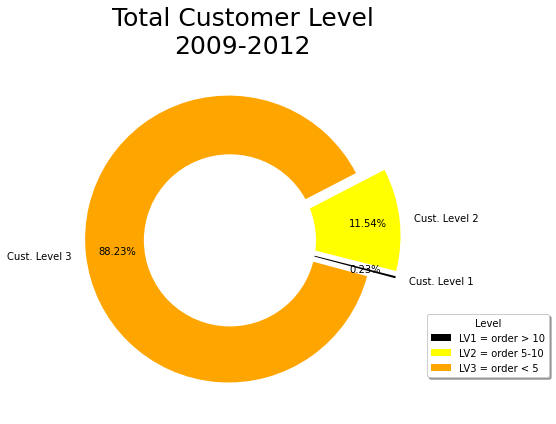

In [30]:
#Plot total customer berdasarkan customer level
label = ['LV1 = order > 10','LV2 = order 5-10','LV3 = order < 5']
custlevel = custbehav.groupby(['cust_level'])['customer'].nunique().reset_index() 
plt.figure(figsize=(8,6)) 
explode = (0.1, 0.1, 0.1)
colors = ['black','yellow','orange']
plt.pie(custlevel['customer'], labels = custlevel['cust_level'], autopct='%1.2f%%', startangle=-15, \
        pctdistance=0.78, colors = colors, explode = explode)
plt.title('Total Customer Level\n2009-2012', pad=2, fontsize=25, color='black') 
plt.legend(bbox_to_anchor=(1,0.3),labels=label,shadow=True, ncol=1, title='Level') 
centre_circle = plt.Circle((-0.09,-0.02),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

# **Cohort Analysis**

*Cohort analysis* digunakan untuk menganalisa perilaku pengguna atau pelanggan yang berfokus pada data-data yang umumnya dikumpulkan dari platform digital. Analisa dilakukan pada data yang diperoleh di tabel sales_store untuk melihat retensi pelanggan di store tersebut 

In [31]:
#Ambil data pada table sales_store dan ubah ke dataframe pandas
alldatacursor = mydb.cursor()
alldatacursor.execute("SELECT * FROM sales_store")
result1 = alldatacursor.fetchall()
dataall = pd.DataFrame(result1)

#Filter row pada cust yang telah menyelesaikan order saja
df = df[df['order_status']=='Order Finished'] 

#Lakukan beberapa penyesuaian
df['order_date'] = pd.to_datetime(df['order_date'])
df['orderperiod'] = df.order_date.apply(lambda x: x.strftime('%Y-%m'))
df.set_index('customer', inplace=True)
df['cohortgroup'] = df.groupby(level=0)['order_date'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)

In [32]:
grouped = df.groupby(['cohortgroup', 'orderperiod'])

# Hitung jumlah customer (count distinct), orders, and total revenue per Group + Period
cohorts = grouped.agg({'customer': pd.Series.nunique,
                       'order_id': pd.Series.nunique,
                       'sales': np.sum})

#Rename beberapa kolom
cohorts.rename(columns={'customer': 'total_cust',
                        'order_id': 'total_orders'}, inplace=True)

In [33]:
def cohort_period(df):
    df['cohortperiod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_cust  total_orders      sales  cohortperiod
cohortgroup orderperiod                                                   
2009-01     2009-01             107           114  373804619             1
            2009-02              18            20   67671442             2
            2009-03              11            11   85391280             3
            2009-04              16            18   55350704             4
            2009-05              16            17   48385577             5

In [34]:
# reindex DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohortgroup', 'cohortperiod'], inplace=True)
cohort_group_size = cohorts['total_cust'].groupby(level=0).first()
user_retention = cohorts['total_cust'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

cohortgroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-09
cohortperiod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.00,1.0,1.0,1.0,1.0
2,0.168224,0.200000,0.188235,0.232143,0.166667,0.119048,0.162162,0.135135,0.157895,0.090909,0.111111,0.083333,0.142857,0.111111,0.0625,0.230769,0.200000,0.272727,0.181818,0.090909,0.333333,0.25,0.666667,0.333333,0.285714,0.333333,0.666667,0.25,0.166667,0.333333,1.0,0.333333,0.666667,0.333333,NaN,1.0,0.25,NaN,1.0,NaN,NaN
3,0.102804,0.142857,0.094118,0.142857,0.250000,0.071429,0.108108,0.135135,0.078947,0.090909,0.111111,0.166667,0.095238,0.055556,0.1250,0.230769,0.466667,0.090909,0.090909,0.090909,0.111111,0.25,0.333333,0.111111,0.142857,0.333333,0.333333,0.25,0.333333,0.333333,1.0,0.333333,0.333333,NaN,NaN,1.0,0.25,NaN,1.0,NaN,NaN
4,0.149533,0.171429,0.070588,0.125000,0.208333,0.095238,0.162162,0.108108,0.131579,0.090909,0.111111,0.041667,0.238095,0.166667,0.1875,0.076923,0.066667,0.090909,0.090909,0.090909,0.111111,0.25,0.333333,0.222222,0.142857,0.333333,0.333333,0.25,0.166667,0.333333,NaN,0.333333,0.333333,NaN,NaN,NaN,0.25,NaN,1.0,NaN,NaN
5,0.149533,0.128571,0.105882,0.142857,0.125000,0.095238,0.270270,0.027027,0.131579,0.136364,0.055556,0.125000,0.047619,0.055556,0.0625,0.230769,0.066667,0.090909,0.090909,0.090909,0.111111,0.25,0.333333,0.111111,0.142857,0.333333,0.333333,0.25,0.500000,0.333333,NaN,0.333333,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
6,0.121495,0.157143,0.211765,0.142857,0.125000,0.071429,0.189189,0.108108,0.078947,0.045455,0.111111,0.083333,0.190476,0.055556,0.1250,0.076923,0.066667,0.181818,0.090909,0.090909,0.111111,0.25,0.666667,0.111111,0.142857,0.333333,0.333333,0.25,0.166667,0.333333,NaN,0.666667,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
7,0.177570,0.185714,0.129412,0.071429,0.125000,0.119048,0.162162,0.108108,0.131579,0.090909,0.055556,0.166667,0.190476,0.111111,0.1250,0.076923,0.066667,0.090909,0.181818,0.090909,0.111111,0.50,0.333333,0.111111,0.142857,0.333333,0.333333,0.75,0.166667,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
8,0.158879,0.228571,0.164706,0.071429,0.166667,0.166667,0.081081,0.081081,0.078947,0.045455,0.055556,0.041667,0.047619,0.166667,0.1875,0.076923,0.133333,0.181818,0.181818,0.272727,0.111111,0.25,0.333333,0.222222,0.428571,0.666667,0.333333,NaN,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
9,0.140187,0.142857,0.152941,0.107143,0.041667,0.095238,0.162162,0.108108,0.210526,0.136364,0.111111,0.166667,0.047619,0.055556,0.0625,0.153846,0.066667,0.090909,0.181818,0.090909,0.111111,0.25,0.333333,0.111111,0.142857,NaN,0.333333,NaN,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Retensi pelanggan di representasikan dengan visualisasi *heatmap*. **Heatmap** adalah visualisasi atau pemetaan dengan menampilkan data dengan representasi warna yang berbeda-beda. Pada bagian ini semakin cerah warnanya maka retensi pelanggan untuk kembali membeli produk di perusahaan tersebut / melakukan transaksi makin tinggi. Namun semakin gelap berarti semakin sedikit

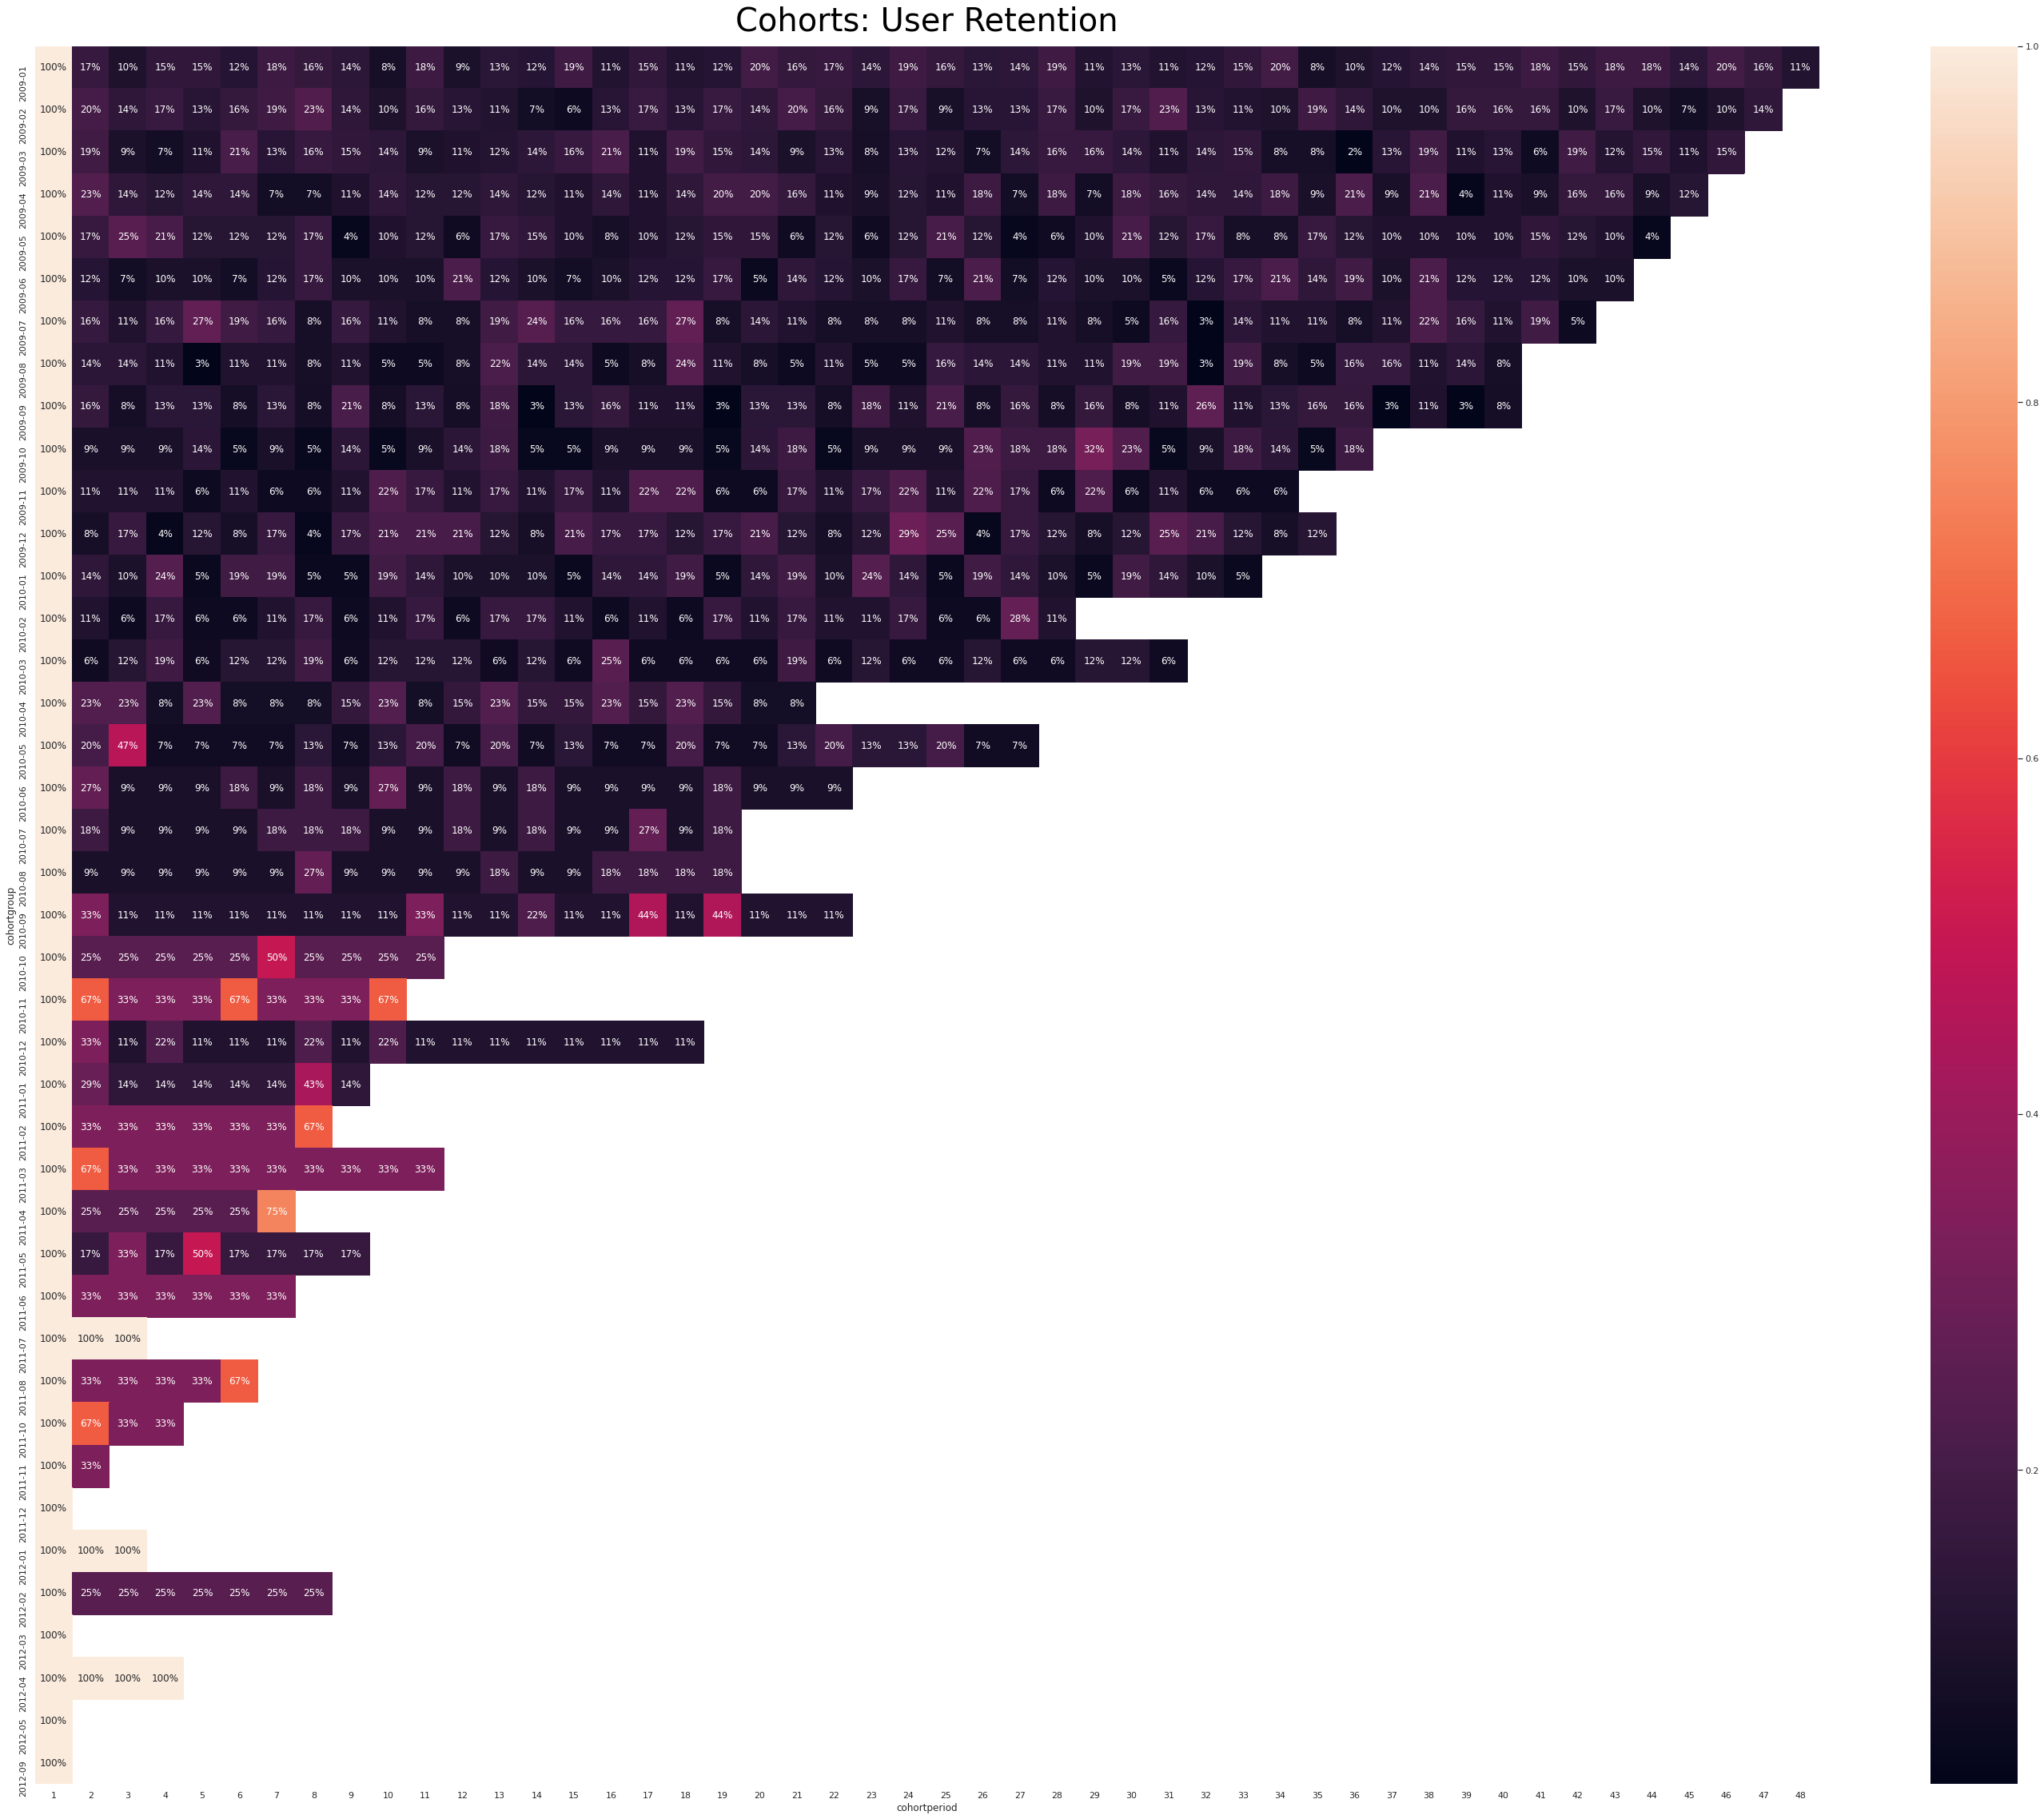

In [35]:
#Plot heatmap 
sns.set(style='white')

plt.figure(figsize=(50, 40))
plt.title('Cohorts: User Retention', pad=20, fontsize=40, color='black') 
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

# **Kesimpulan**

1.   Analisa menyeluruh mengenai pelanggan dapat dilakukan dengan menghitung jumlah pelanggan tiap periode tertentu, menganalisa pertumbuhan pelanggan baru yang melakukan transaksi, segmentasi pelanggan, dsb. Agar perusahaan mampu mengevaluasi dan mengambil kebijakan yang tepat di kemudian hari sehingga profit yang dihasilkan juga semakin naik dan agar perusahaan bisa meningkatkan kualitas pelayanan yang tepat dan efisien sehingga mampu mempertahankan pelanggan
2.   DQLab Store perlu untuk melakukan strategi *campaign* atau promosi yang tepat guna meningkatkan jumlah pelanggan baru pada tiap bulannya dan mentargetkan siapa saja pelanggan yang perlu untuk dipertahankan
3.   Cohort Analysis dapat digunakan untuk melihat pola retensi pelanggan berdasarkan kategori tertentu

